In [1]:
# If on Colab, run this first
!pip -q install pandas numpy scikit-learn imbalanced-learn shap xgboost lightgbm matplotlib


In [2]:
!mkdir -p data


In [3]:
!pip install kaggle
!mkdir ~/.kaggle
from google.colab import files
files.upload()  # upload kaggle.json here
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d blastchar/telco-customer-churn -p data --unzip
!mv data/Telco-Customer-Churn.csv data/telco_churn.csv


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 471MB/s]
mv: cannot stat 'data/Telco-Customer-Churn.csv': No such file or directory


In [4]:
!ls -l data


total 956
-rw-r--r-- 1 root root 977501 Nov  2 06:04 WA_Fn-UseC_-Telco-Customer-Churn.csv


In [5]:
!mv data/WA_Fn-UseC_-Telco-Customer-Churn.csv data/telco_churn.csv


In [6]:
!ls data


telco_churn.csv


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/telco_churn.csv")

# Convert Yes/No to 1/0 for target column
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

target = "Churn"
X = df.drop(columns=[target])
y = df[target].astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(X_train.shape, X_valid.shape, X_test.shape)


(4930, 20) (1056, 20) (1057, 20)


In [8]:
!pip install seaborn matplotlib missingno


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv("data/telco_churn.csv")
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

print(df.head())
print(df.info())
print(df.describe(include="all").T)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


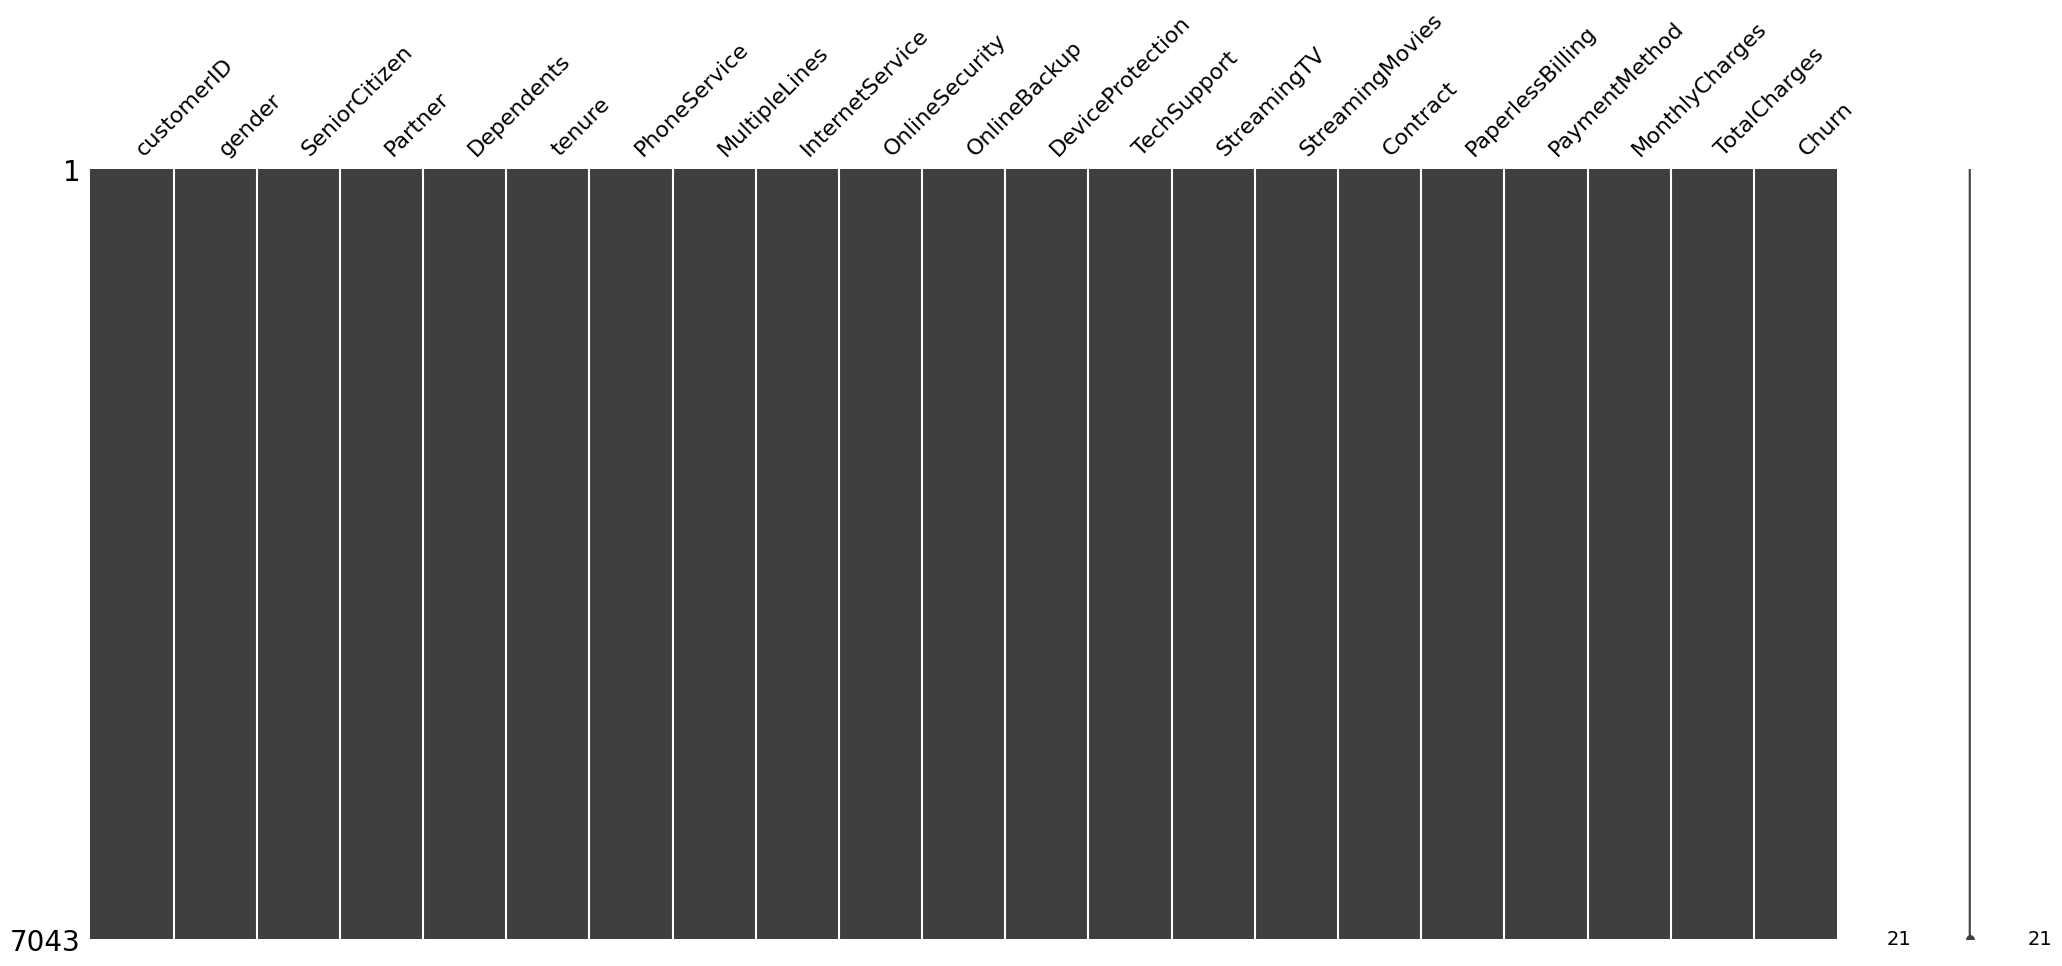

In [11]:
msno.matrix(df)
plt.show()


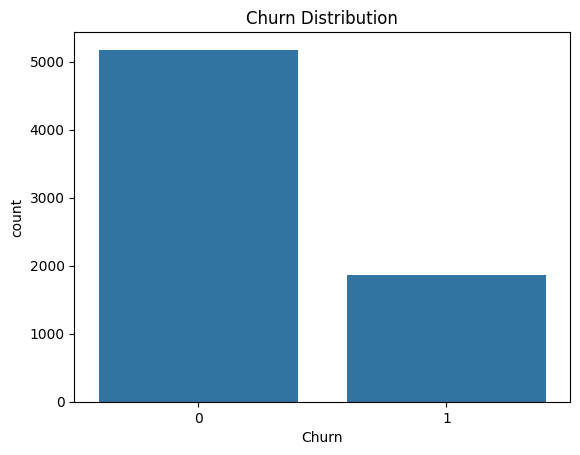

Churn Rate: 0.2653698707936959


In [12]:
sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()

churn_rate = df["Churn"].mean()
print("Churn Rate:", churn_rate)


In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", cat_cols)


Numeric Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')
Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')


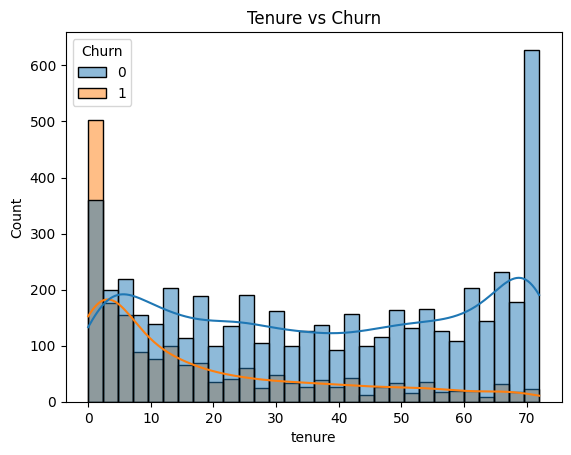

In [14]:
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Tenure vs Churn")
plt.show()


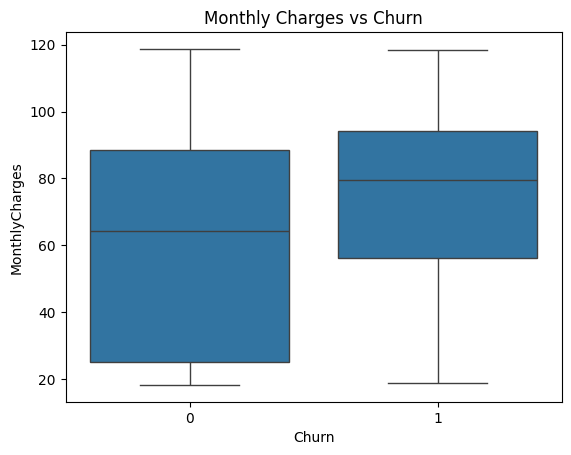

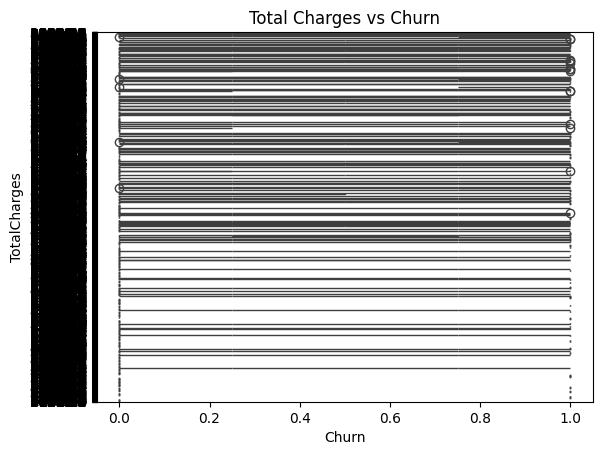

In [15]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()


In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


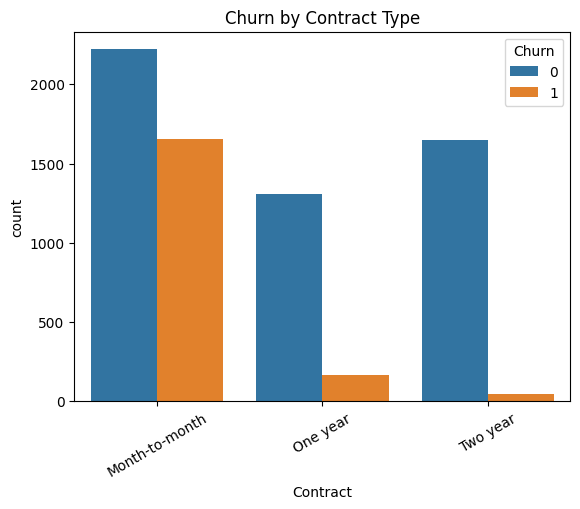

In [17]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()


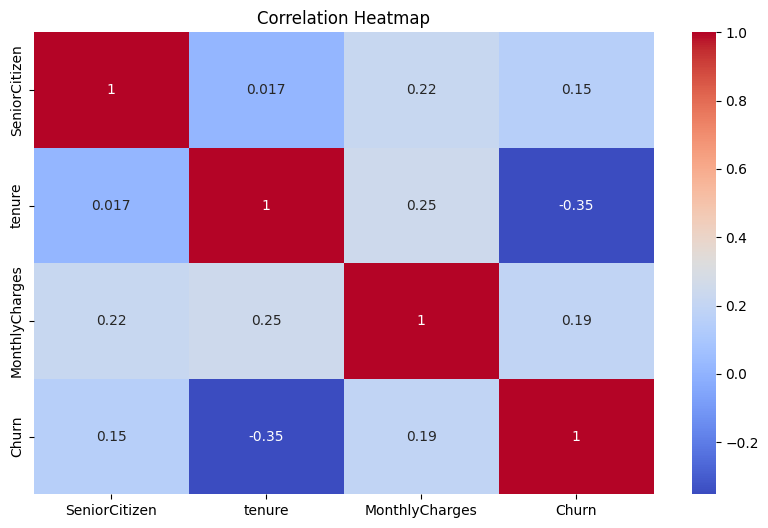

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
df = pd.read_csv("data/telco_churn.csv")

# Convert target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Convert TotalCharges to numeric (coerce errors)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop customerID
df = df.drop(columns=["customerID"])

# Check missing again
print(df.isnull().sum())


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [20]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-40832498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [21]:
from sklearn.model_selection import train_test_split

target = "Churn"
X = df.drop(columns=[target])
y = df[target]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

X_train.shape, X_valid.shape, X_test.shape


((4930, 19), (1056, 19), (1057, 19))

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [23]:
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [24]:
X_train_transformed = preprocessor.transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape


(4930, 45)

In [25]:
!mkdir -p artifacts


In [26]:
import joblib
joblib.dump(preprocessor, "artifacts/preprocessor.pkl")


['artifacts/preprocessor.pkl']

In [27]:
!ls artifacts


preprocessor.pkl


In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [29]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_transformed, y_train)
y_pred_dummy = dummy.predict(X_valid_transformed)

print("Baseline Accuracy:", dummy.score(X_valid_transformed, y_valid))
print(classification_report(y_valid, y_pred_dummy))


Baseline Accuracy: 0.7348484848484849
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       776
           1       0.00      0.00      0.00       280

    accuracy                           0.73      1056
   macro avg       0.37      0.50      0.42      1056
weighted avg       0.54      0.73      0.62      1056



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_transformed, y_train)

y_pred_lr = lr.predict(X_valid_transformed)
y_pred_lr_proba = lr.predict_proba(X_valid_transformed)[:,1]

print("LR ROC-AUC:", roc_auc_score(y_valid, y_pred_lr_proba))
print(classification_report(y_valid, y_pred_lr))


LR ROC-AUC: 0.8452572717231223
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       776
           1       0.65      0.59      0.62       280

    accuracy                           0.81      1056
   macro avg       0.75      0.74      0.74      1056
weighted avg       0.80      0.81      0.80      1056



In [31]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_transformed, y_train)

y_pred_lr = lr.predict(X_valid_transformed)
y_pred_lr_proba = lr.predict_proba(X_valid_transformed)[:,1]

print("LR ROC-AUC:", roc_auc_score(y_valid, y_pred_lr_proba))
print(classification_report(y_valid, y_pred_lr))


LR ROC-AUC: 0.8452572717231223
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       776
           1       0.65      0.59      0.62       280

    accuracy                           0.81      1056
   macro avg       0.75      0.74      0.74      1056
weighted avg       0.80      0.81      0.80      1056



In [32]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train_transformed, y_train)
y_pred_xgb = xgb.predict(X_valid_transformed)
y_pred_xgb_proba = xgb.predict_proba(X_valid_transformed)[:,1]

print("XGB ROC-AUC:", roc_auc_score(y_valid, y_pred_xgb_proba))
print(classification_report(y_valid, y_pred_xgb))


XGB ROC-AUC: 0.8416214101620031
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       776
           1       0.62      0.52      0.57       280

    accuracy                           0.79      1056
   macro avg       0.73      0.70      0.71      1056
weighted avg       0.78      0.79      0.78      1056



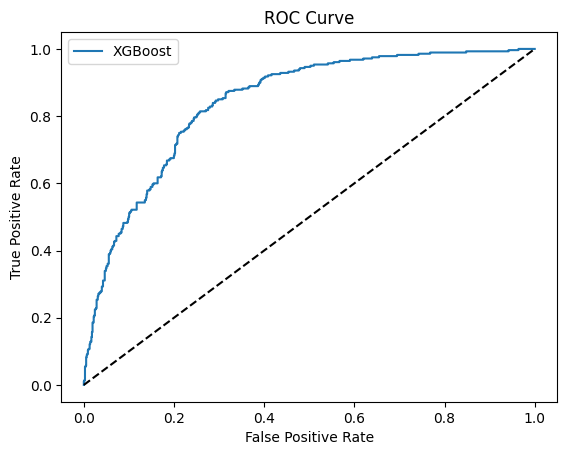

In [33]:
fpr, tpr, _ = roc_curve(y_valid, y_pred_xgb_proba)
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


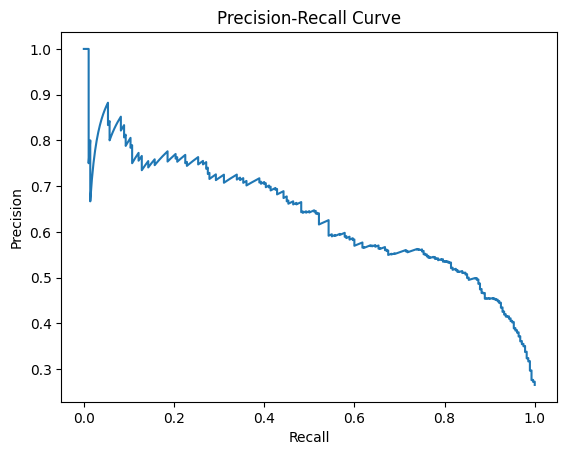

In [34]:
precision, recall, _ = precision_recall_curve(y_valid, y_pred_xgb_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [35]:
joblib.dump(xgb, "artifacts/best_model.pkl")
print("Model saved.")


Model saved.


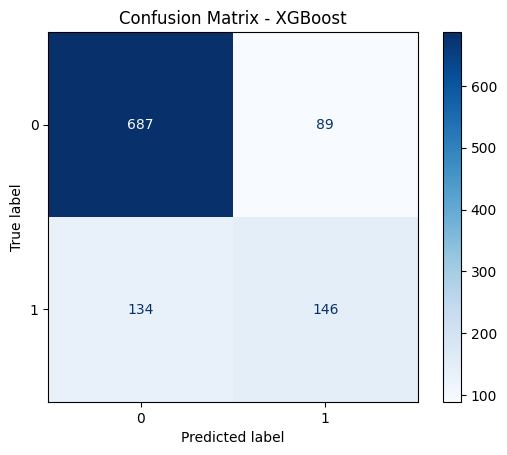

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [37]:
print(classification_report(y_valid, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       776
           1       0.62      0.52      0.57       280

    accuracy                           0.79      1056
   macro avg       0.73      0.70      0.71      1056
weighted avg       0.78      0.79      0.78      1056



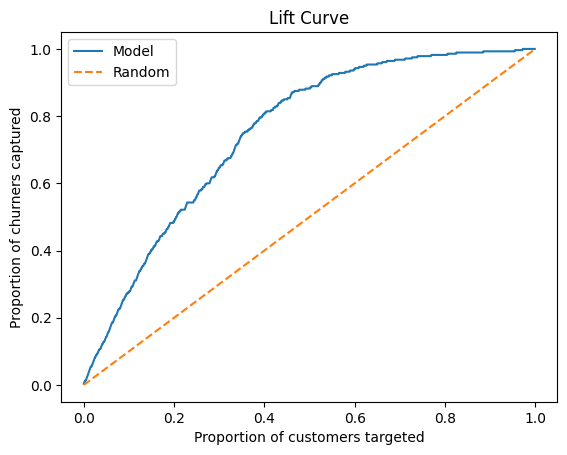

In [38]:
import numpy as np

def plot_lift_curve(y_true, y_scores):
    df_score = pd.DataFrame({'y': y_true, 'proba': y_scores})
    df_score = df_score.sort_values('proba', ascending=False).reset_index(drop=True)
    df_score['cumulative_gain'] = df_score['y'].cumsum() / df_score['y'].sum()
    df_score['cumulative_percentage'] = np.arange(len(df_score)) / len(df_score)

    plt.plot(df_score['cumulative_percentage'], df_score['cumulative_gain'], label='Model')
    plt.plot(df_score['cumulative_percentage'], df_score['cumulative_percentage'], '--', label='Random')
    plt.title("Lift Curve")
    plt.xlabel("Proportion of customers targeted")
    plt.ylabel("Proportion of churners captured")
    plt.legend()
    plt.show()

plot_lift_curve(y_valid, y_pred_xgb_proba)


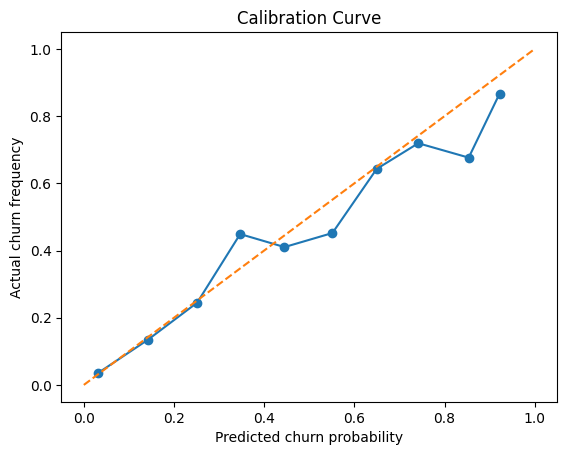

In [39]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_valid, y_pred_xgb_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'--')
plt.title("Calibration Curve")
plt.xlabel("Predicted churn probability")
plt.ylabel("Actual churn frequency")
plt.show()


PermutationExplainer explainer: 4931it [13:20,  6.16it/s]


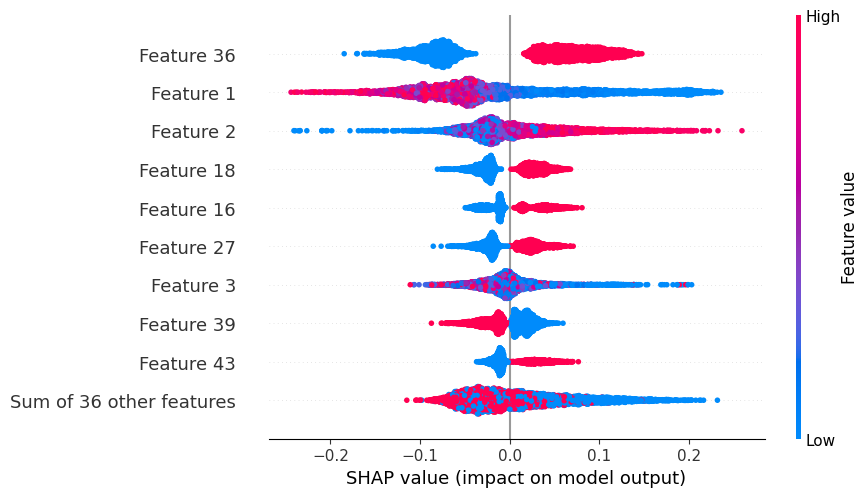

In [40]:
import shap

# Encode data
X_train_enc = preprocessor.transform(X_train)
X_train_enc = X_train_enc.toarray() if hasattr(X_train_enc, "toarray") else X_train_enc

# Model-agnostic SHAP explainer (works with newest XGBoost)
explainer = shap.Explainer(lambda x: xgb.predict_proba(x)[:,1], X_train_enc)
shap_values = explainer(X_train_enc)

# Plot
shap.plots.beeswarm(shap_values)


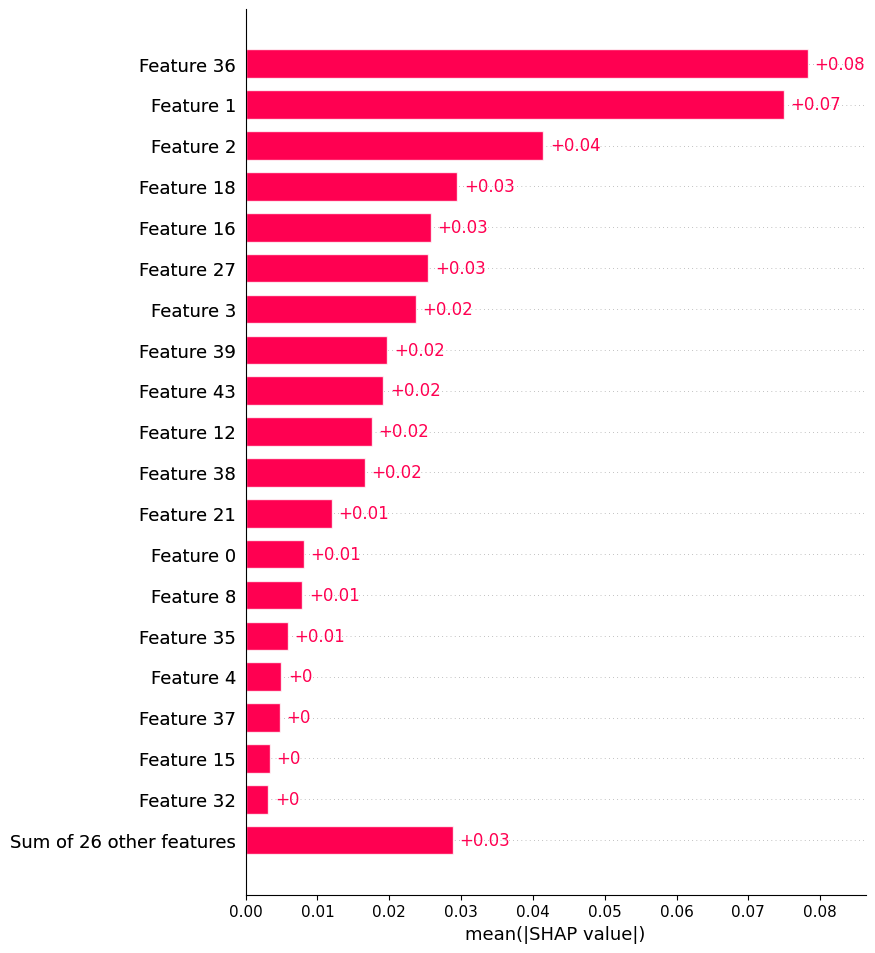

In [41]:
ohe = preprocessor.named_transformers_['cat']
ohe_cols = ohe.get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(ohe_cols)

shap.plots.bar(shap_values, max_display=20)


In [42]:
from sklearn.pipeline import Pipeline
import joblib

final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb)
])

joblib.dump(final_pipeline, "artifacts/final_churn_pipeline.pkl")


['artifacts/final_churn_pipeline.pkl']

In [43]:
sample = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 2,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "No",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 75.5,
    "TotalCharges": 160.0
}


In [44]:
pipeline = joblib.load("artifacts/final_churn_pipeline.pkl")

proba = pipeline.predict_proba(pd.DataFrame([sample]))[0][1]
pred = pipeline.predict(pd.DataFrame([sample]))[0]

proba, pred


(np.float32(0.64337844), np.int64(1))